In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('shopping.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


**Check the distribution of target label 'Revenue'**

Mostly customers donot end up shopping

In [4]:
df.groupby('Revenue')['Revenue'].count()

Revenue
False    10422
True      1908
Name: Revenue, dtype: int64

## 0. Label Encoding on Categorical String Data

In [5]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [6]:
# Let's try dictionary mapping
months = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

df['Month'] = df['Month'].map(months)

In [7]:
df['Month'].unique()

array([ 2,  3,  5, 10,  6,  7,  8, 11,  9, 12], dtype=int64)

In [8]:

df['VisitorType'] = df['VisitorType'].astype('category')
df['VisitorType'].dtype
# 

CategoricalDtype(categories=['New_Visitor', 'Other', 'Returning_Visitor'], ordered=False)

In [9]:
df['VisitorType'] = df['VisitorType'].cat.codes

In [10]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False


In [11]:
df['Weekend'] = df['Weekend'].astype('category')
df['Weekend'].dtypes

CategoricalDtype(categories=[False, True], ordered=False)

In [12]:
df['Weekend'] = df['Weekend'].cat.codes

In [13]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,False


## 1. Extract Features

In [14]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

## 2. Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 3. Train KNN Classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

model = knn.fit(X_train, y_train)

In [17]:
y_predict = model.predict(X_test)

## 4. Evaluate Classifier

In [18]:
model.score(X_test, y_test)

0.8203048978267921

In [19]:
model.score(X_train, y_train)

1.0

In [20]:
training_score = []
test_score = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    model = knn.fit(X_train, y_train)
    
    training_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))

In [21]:
%matplotlib notebook

<IPython.core.display.Javascript object>


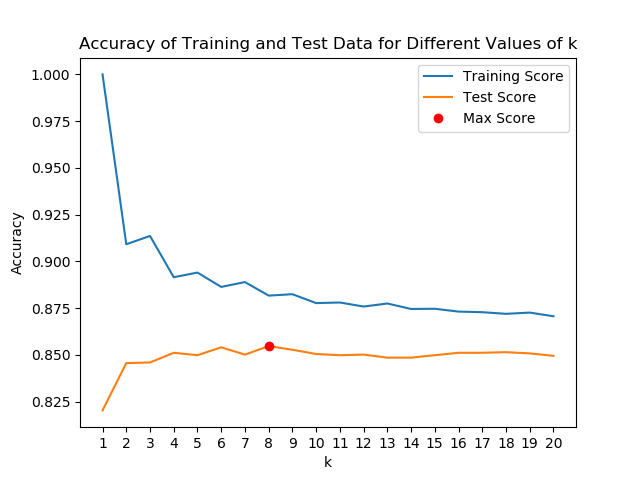

In [22]:
import matplotlib.pyplot as plt

k = range(1,21)

plt.figure()
plt.plot(k, training_score, label='Training Score')
plt.plot(k, test_score, label='Test Score')

plt.xticks(range(1,21))

plt.plot(test_score.index(max(test_score))+1, max(test_score), 'o', c='r', label='Max Score')

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy of Training and Test Data for Different Values of k')
plt.legend()

In [23]:
plt.savefig('accuracay.jpg')

## 5. Retrain the Classifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=8)

model = knn.fit(X_train, y_train)

In [25]:
y_predict = model.predict(X_test)

In [26]:
Accuracy = model.score(X_test, y_test)
Accuracy

0.8546869931884528

**Model has achieved maximum accuracy of 85.4% using k=8 neighbors**